In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:

import seaborn as sns

In [5]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [6]:
df=pd.read_csv('https://raw.githubusercontent.com/haber021/Projet_01/main/AEP_hourly.csv')

In [7]:
df=df.set_index('Datetime')

In [8]:
df.index=pd.to_datetime(df.index)

In [9]:

df

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0
...,...
2018-01-01 20:00:00,21089.0
2018-01-01 21:00:00,20999.0
2018-01-01 22:00:00,20820.0


<Axes: title={'center': 'PJME Energy Use in MW'}, xlabel='Datetime'>

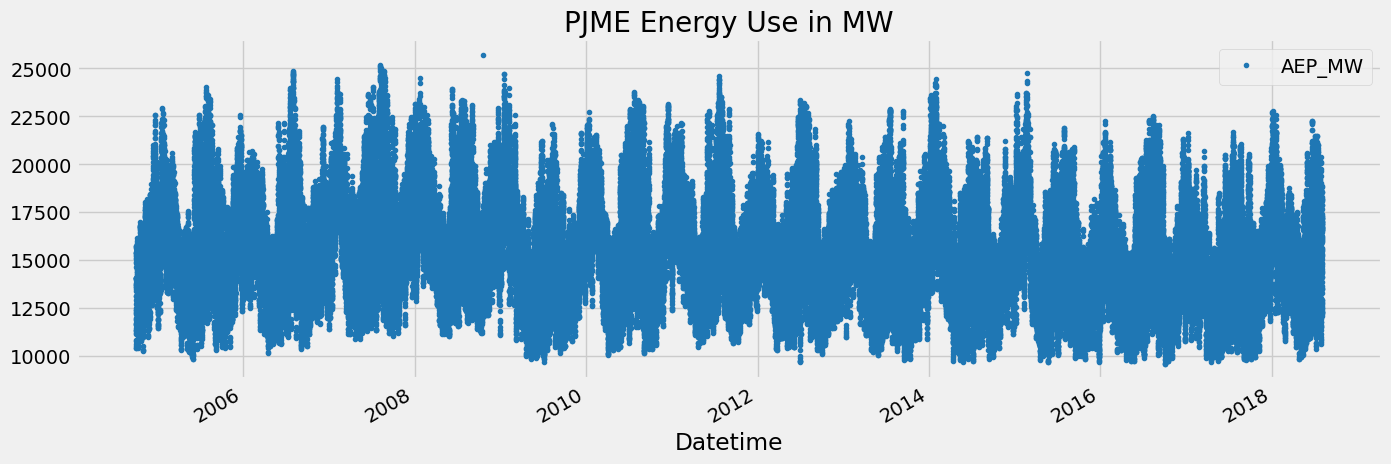

In [10]:
df.plot(style='.', figsize=(15, 5), color=color_pal[0], title='PJME Energy Use in MW')

In [11]:

df.index=pd.to_datetime(df.index)

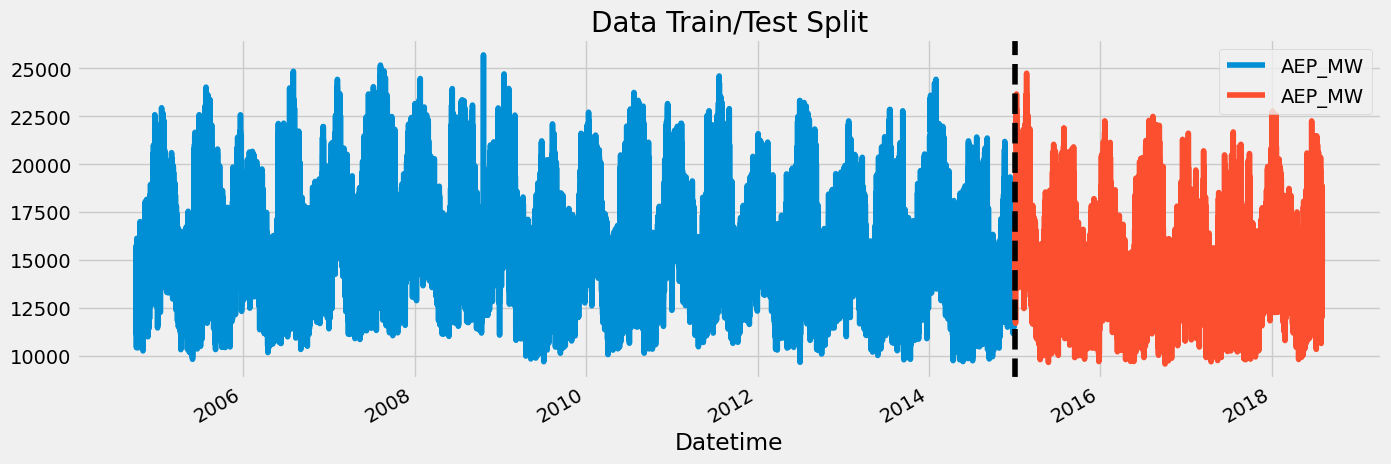

In [12]:
train =df.loc[df.index < '01-01-2015']
test = df.loc[df.index >='01-01-2015']

fig, ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax, label = 'Traning set', title = 'Data Train/Test Split')
test.plot(ax=ax, label='Test set')
ax.axvline('01-01-2015', color ='black', ls = '--')
plt.show()

<Axes: title={'center': 'Week of date'}, xlabel='Datetime'>

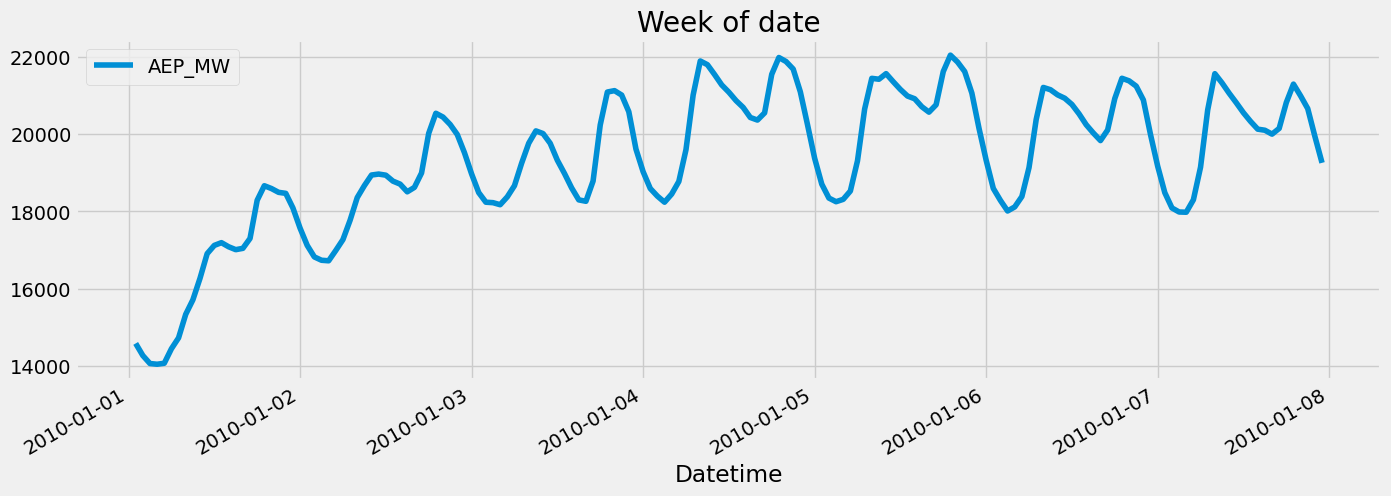

In [15]:
df.loc[(df.index > '01-01-2010') & (df.index < '01-08-2010')].plot(figsize=(15, 5), title='Week of date')


In [16]:
def create_features(df):
   df['hour'] =df.index.hour
   df['dayofweek'] =df.index.dayofweek
   df['quarter'] =df.index.quarter
   df['month'] =df.index.month
   df['dayofyear'] =df.index.dayofyear
   return df

In [17]:
df=create_features(df)

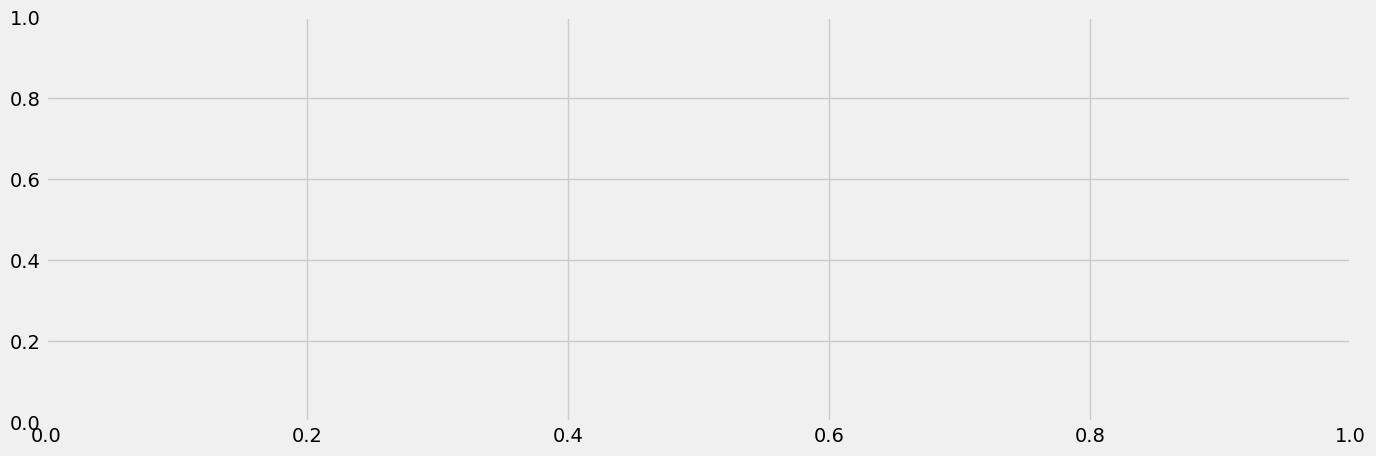

In [18]:
Fig,ax=plt.subplots(figsize=(15,5))

<Axes: xlabel='hour', ylabel='AEP_MW'>

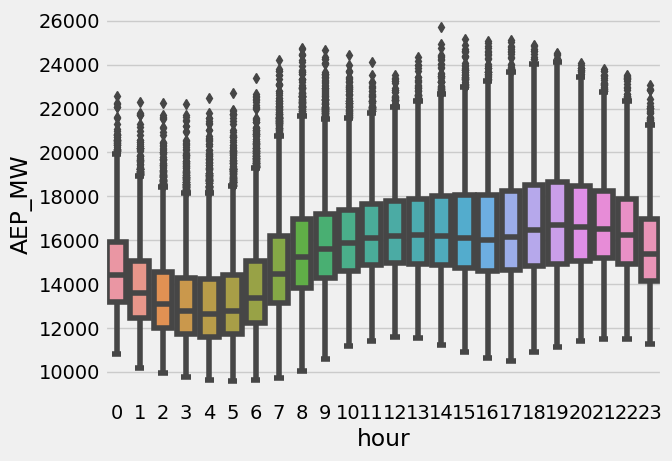

In [19]:
sns.boxplot(data=df,x='hour',y='AEP_MW')

In [20]:
train=create_features(train)
test=create_features(test)

<ipython-input-16-9c10c5e167dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] =df.index.hour
<ipython-input-16-9c10c5e167dc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofweek'] =df.index.dayofweek
<ipython-input-16-9c10c5e167dc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [21]:
FEATURES=['hour','dayofweek','quarter','month','dayofyear']

In [23]:
TARGET='AEP_MW'

In [24]:
x_train=train[FEATURES]
y_train = train[TARGET]

x_test=test[FEATURES]
y_test=test[TARGET]

In [25]:
from re import VERBOSE
reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50,
                       learning_rate=0.01)
reg.fit(x_train, y_train,
        eval_set=[(x_train, y_train), (x_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:2557.15459	validation_1-rmse:2669.95076
[100]	validation_0-rmse:1680.25073	validation_1-rmse:1947.30129
[200]	validation_0-rmse:1459.53464	validation_1-rmse:1814.64832
[300]	validation_0-rmse:1382.65967	validation_1-rmse:1781.48256
[400]	validation_0-rmse:1344.38359	validation_1-rmse:1774.14850
[477]	validation_0-rmse:1325.62484	validation_1-rmse:1774.52541


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

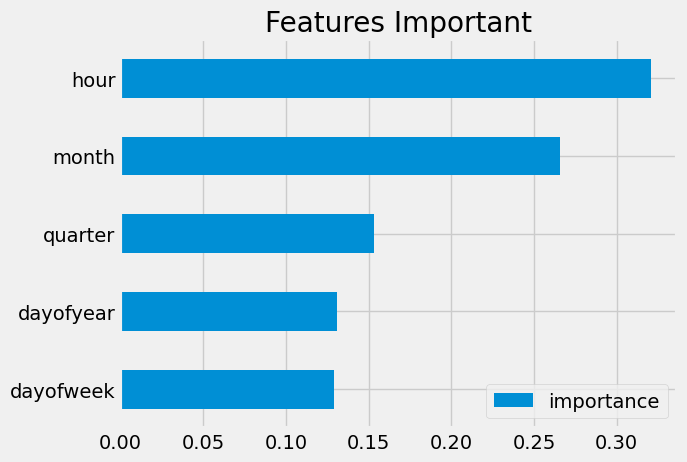

In [26]:
fi = pd.DataFrame(data=reg.feature_importances_,
                  index=reg.feature_names_in_,
                  columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Features Important')
plt.show()

In [27]:
reg.predict(x_test)
test['prediction']=reg.predict(x_test)
df.head(10)

<ipython-input-27-07185ab8b061>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction']=reg.predict(x_test)


,AEP_MW,hour,dayofweek,quarter,month,dayofyear
Datetime,,,,,,
2004-12-31 01:00:00,13478.0,1,4,4,12,366
2004-12-31 02:00:00,12865.0,2,4,4,12,366
2004-12-31 03:00:00,12577.0,3,4,4,12,366
2004-12-31 04:00:00,12517.0,4,4,4,12,366
2004-12-31 05:00:00,12670.0,5,4,4,12,366
2004-12-31 06:00:00,13038.0,6,4,4,12,366
2004-12-31 07:00:00,13692.0,7,4,4,12,366
2004-12-31 08:00:00,14297.0,8,4,4,12,366
2004-12-31 09:00:00,14719.0,9,4,4,12,366


In [28]:
df.merge(test,how='left',left_index=True,right_index=True)

,AEP_MW_x,hour_x,dayofweek_x,quarter_x,month_x,dayofyear_x,AEP_MW_y,hour_y,dayofweek_y,quarter_y,month_y,dayofyear_y,prediction
Datetime,,,,,,,,,,,,,
2004-10-01 01:00:00,12379.0,1,4,4,10,275,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-10-01 02:00:00,11935.0,2,4,4,10,275,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-10-01 03:00:00,11692.0,3,4,4,10,275,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-10-01 04:00:00,11597.0,4,4,4,10,275,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-10-01 05:00:00,11681.0,5,4,4,10,275,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-02 20:00:00,17673.0,20,3,3,8,214,17673.0,20.0,3.0,3.0,8.0,214.0,19616.332031
2018-08-02 21:00:00,17303.0,21,3,3,8,214,17303.0,21.0,3.0,3.0,8.0,214.0,19566.503906
2018-08-02 22:00:00,17001.0,22,3,3,8,214,17001.0,22.0,3.0,3.0,8.0,214.0,19319.343750


In [29]:
df.head()

,AEP_MW,hour,dayofweek,quarter,month,dayofyear
Datetime,,,,,,
2004-12-31 01:00:00,13478.0,1,4,4,12,366
2004-12-31 02:00:00,12865.0,2,4,4,12,366
2004-12-31 03:00:00,12577.0,3,4,4,12,366
2004-12-31 04:00:00,12517.0,4,4,4,12,366
2004-12-31 05:00:00,12670.0,5,4,4,12,366


In [30]:
test['prediction'] = reg.predict(x_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)

<ipython-input-30-272ebab184de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(x_test)


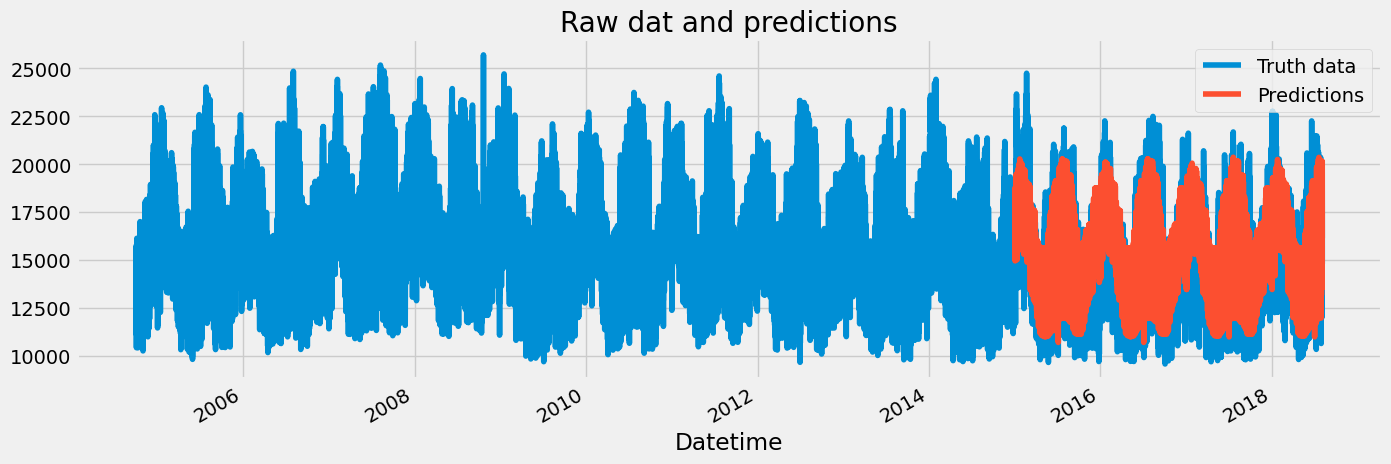

In [31]:
ax = df[['AEP_MW']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style ='-')
plt.legend(['Truth data', 'Predictions'])
ax.set_title('Raw dat and predictions')
plt.show()